In [74]:
import pandas as pd
import requests
import json
import csv

In [75]:
# Constants
CASES_URL = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv'
DEATHS_URL = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv'
POPS_URL = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv'

In [76]:
# update_data -> None
# updates the cases, deaths, and pops json files to have the most recent data from usafacts.org.
def update_data():
    
    # Get Cases
    cases_data = {}
    cases_r = requests.get(CASES_URL)
    cases_reader = csv.DictReader(io.StringIO(cases_r.text))
    
    for rows in cases_reader:
        idx = list(rows.keys())[0]
        key = rows[idx]
        cases_data[key] = rows
        
    with open('cases.json', 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(cases_data, indent=4))
        
    # Get Deaths
    deaths_data = {}
    deaths_r = requests.get(DEATHS_URL)
    deaths_reader = csv.DictReader(io.StringIO(deaths_r.text))
    
    for rows in deaths_reader:
        idx = list(rows.keys())[0]
        key = rows[idx]
        deaths_data[key] = rows
        
    with open('deaths.json', 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(deaths_data, indent=4))
        
    # Get Populations
    pops_data = {}
    pops_r = requests.get(POPS_URL)
    pops_reader = csv.DictReader(io.StringIO(pops_r.text))
    
    for rows in pops_reader:
        idx = list(rows.keys())[0]
        key = rows[idx]
        pops_data[key] = rows
        
    with open('pops.json', 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(pops_data, indent=4))
    
update_data()

In [77]:
# get_dataframes -> (DataFrame, DataFrame, DataFrame)
# reads the cases, deaths, and populations json files in and converts them to pandas dataframes.
def get_dataframes():
    cases_df = ''
    deaths_df = ''
    pops_df = ''

    with open('cases.json') as file:
        cases_data = json.load(file)
        cases_df = pd.DataFrame(cases_data).transpose()
    
    with open('deaths.json') as file:
        deaths_data = json.load(file)
        deaths_df = pd.DataFrame(deaths_data).transpose()
        
    with open('pops.json') as file:
        pops_data = json.load(file)
        pops_df = pd.DataFrame(pops_data).transpose()
        
    return (cases_df, deaths_df, pops_df)
        
    
cases_df, deaths_df, pops_df = get_dataframes()

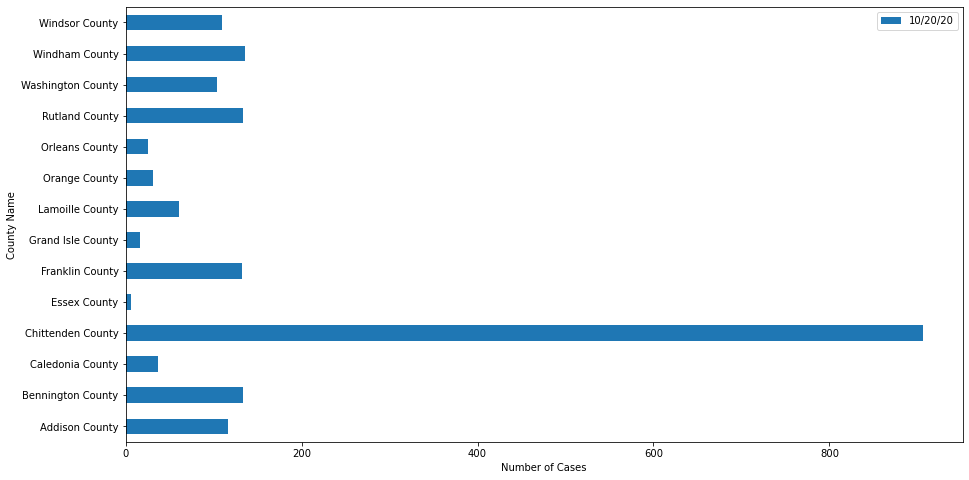

In [159]:
def cases_bar_graph_by_state_by_date(state, date):
    graphing_df = cases_df.copy()
    graphing_df = graphing_df.loc[graphing_df['State'] == state]
    graphing_df[date] = graphing_df[date].astype(int)
    
    ax = graphing_df.plot.barh(x='County Name', y=date, figsize=(15,8)).set(xlabel='Number of Cases')
    
cases_bar_graph_by_state_by_date('VT', '10/20/20')

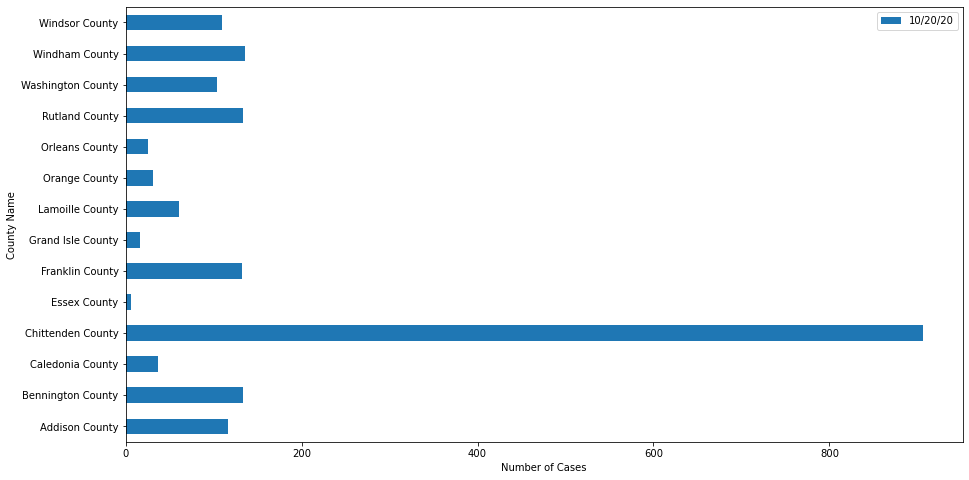

In [160]:
def deaths_bar_graph_by_state_by_date(state, date):
    graphing_df = deaths_df.copy()
    graphing_df = graphing_df.loc[graphing_df['State'] == state]
    graphing_df[date] = graphing_df[date].astype(int)
    
    ax = graphing_df.plot.barh(x='County Name', y=date, figsize=(15,8)).set(xlabel='Number of Deaths')
    
cases_bar_graph_by_state_by_date('VT', '10/20/20')